### **Exraction of Zip File**

In [1]:
from zipfile import ZipFile 
file_name= "Dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


### **Calling Dataset and labelling of Images categoriacally**

In [72]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

dir= '/content/Dataset'
categories= ['Tshirt','kurti', 'shirt', 'skirt']
data=[]
for category in categories:
  path=os.path.join(dir,category)
  label=categories.index(category)

  for img in os.listdir(path):
    imgpath=os.path.join(path,img)
    clt_img=cv2.imread(imgpath,0)
    clt_img=cv2.resize(clt_img,(50,50))
    image=np.array(clt_img).flatten()

    data.append([image,label])



### **dumping data object into byte format**

In [73]:
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

### **Loading dumped file**

In [74]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

### **Random shuffling of data and appending features and labels**

In [75]:
import random
random.shuffle(data)
features=[]
labels=[]

for feature, label in data:
  features.append(feature)
  labels.append(label)


### **Train and Test Data split**

In [112]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(features, labels, test_size=0.20)

## **1.) Fitting of model using SUPPORT VECTOR MACHINE(SVM) Algorithm**

In [113]:
from sklearn.svm import SVC
model= SVC(C=1.0, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)




SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## **Prediction of the model as per SVM algorithm**

In [114]:
prediction =model.predict(xtest)

### **Accuracy and testing of data model**

In [115]:
accuracy=model.score(xtest, ytest)
categories= ['Tshirt','kurti', 'shirt', 'skirt']
print("Accuracy is :",accuracy)


Accuracy is : 0.7659574468085106


### **Classification Report for SVM**

In [116]:
from sklearn.metrics import classification_report
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        36
           1       0.86      0.77      0.81        39
           2       0.73      0.71      0.72        31
           3       0.78      0.83      0.81        35

    accuracy                           0.77       141
   macro avg       0.77      0.76      0.76       141
weighted avg       0.77      0.77      0.77       141



### **Confusion Matrix for SVM model**

In [117]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(ytest,prediction)
c

array([[27,  1,  7,  1],
       [ 4, 30,  0,  5],
       [ 6,  1, 22,  2],
       [ 2,  3,  1, 29]])

prediction is:  shirt


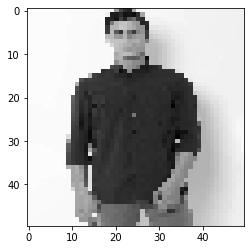

In [118]:
print("prediction is: ", categories[prediction[5]])
mycloth=xtest[5].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

prediction is:  skirt


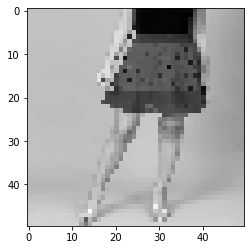

In [119]:
print("prediction is: ", categories[prediction[6]])
mycloth=xtest[6].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

prediction is:  Tshirt


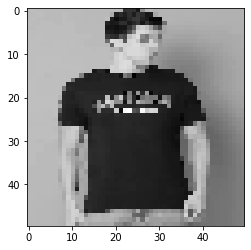

In [120]:
print("prediction is: ", categories[prediction[7]])
mycloth=xtest[7].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

prediction is:  Tshirt


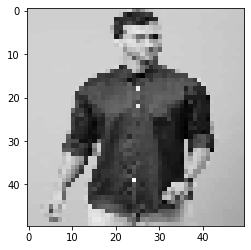

In [121]:
print("prediction is: ", categories[prediction[9]])
mycloth=xtest[9].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

### **2.) Fitting of model using MULTIVARIATE LOGISTIC REGRESSION(LR) Algorithm**

In [122]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='liblinear')
lg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### **Prediction for LR**

In [123]:
pred=lg.predict(xtest)
pred

array([0, 1, 1, 0, 2, 0, 3, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 3, 1, 0, 0, 1,
       3, 1, 1, 1, 1, 1, 1, 3, 0, 2, 3, 0, 3, 3, 2, 1, 1, 0, 0, 2, 1, 1,
       2, 2, 3, 0, 3, 2, 2, 3, 1, 3, 1, 0, 2, 1, 3, 3, 1, 1, 0, 3, 3, 3,
       3, 1, 0, 3, 0, 3, 2, 2, 1, 3, 2, 1, 3, 0, 3, 3, 2, 0, 0, 0, 2, 3,
       0, 3, 1, 1, 0, 1, 3, 1, 3, 2, 3, 0, 1, 1, 2, 1, 1, 1, 0, 3, 0, 1,
       3, 3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 3, 1, 3,
       2, 0, 2, 3, 0, 3, 2, 0, 1])

### **Accuracy of the model**

In [124]:
scores=lg.score(xtest,ytest)
scores

0.6737588652482269

### **Classification Report for LR model**

In [125]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58        36
           1       0.69      0.74      0.72        39
           2       0.68      0.55      0.61        31
           3       0.76      0.80      0.78        35

    accuracy                           0.67       141
   macro avg       0.67      0.67      0.67       141
weighted avg       0.67      0.67      0.67       141



### **Confusion Matrix**

In [126]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,pred)
cm

array([[21,  7,  6,  2],
       [ 5, 29,  1,  4],
       [ 8,  3, 17,  3],
       [ 3,  3,  1, 28]])

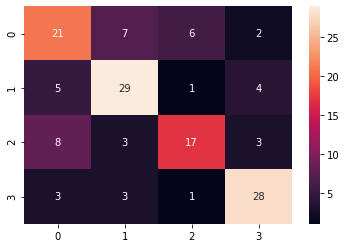

In [127]:
import seaborn as sns
sns.heatmap(cm,annot=True)

### **ROC Score**

## **1.) Roc Score for LR model**

In [128]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(ytest)
ytest = lb.transform(ytest)
pred = lb.transform(pred)
roc=roc_auc_score(ytest, pred, average='macro')
print(roc)

0.7797306634774412
